# EDA Análisis exploratorio de datos 

Importamos librerías

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

### Importación de datos del csv AccidentesAviones

In [38]:
#Importamos el csv
df_accidente= pd.read_csv('data/AccidentesAviones.csv')
#Observamos las primeras 5 filas
df_accidente.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


Observamos cantidad de filas

In [39]:
# Cantidad de registros
df_accidente.shape[0]

5008

## Diccionario de datos

Unnamed0: índice

fecha: fecha del accidente

HORA declarada: hora declarada del accidente

Ruta: contiene información del lugar del accidente

OperadOR: operador o compañía aérea a la que pertenece la aeronave

flight_no: número de vuelo

route: plan de vuelo planificado

ac_type: tipo de aeronave

registration: número de registro de la aeronave

cn_ln: contiene información de la construcción y número de línea de la aeronave

all_aboard: total de personas en la aeronave (tripulación y pasajeros)

PASAJEROS A BORDO: total de pasajeros a bordo de la aeronave

crew_aboard: tripulación de la aeronave

cantidad de fallecidos: cantidad de fallecidos en el accidente

passenger_fatalities: cantidad de pasajeros fallecidos

crew_fatalities: cantidad de la tripulación fallecida en el accidente

grund: corresponde a la cantidad de personas que no estaban en la aeronave que murieron a causa del accidente

summary: descripción del accidente y/o causa del mismo

### Hacemos un ETL para lo que consideramos necesario:

#### Corregimos los nombres de las columnas para que sean más legibles y estén en un mismo idioma.

In [40]:
df_accidente = df_accidente.rename(columns={
    'Unnamed: 0':'id',
    'fecha': 'Fecha',
    'HORA declarada': 'Hora',
    'OperadOR': 'Operador del vuelo',
    'flight_no': 'Numero de vuelo',
    'route': 'Tipo de vuelo',
    'ac_type': 'Tipo de avion',
    'registration': 'Matricula avion',
    'cn_ln': 'Numero de serie avion',
    'all_aboard': 'Todos a bordo',
    'PASAJEROS A BORDO': 'Pasajeros a bordo',
    'crew_aboard': 'Tripulacion a bordo',
    'cantidad de fallecidos': 'Cantidad de fallecidos',
    'passenger_fatalities': 'Pasajeros fatales',
    'crew_fatalities': 'Miembros fatales',
    'ground': 'Afectados en tierra',
    'summary': 'Descripcion del accidente',
})
df_accidente.columns

Index(['id', 'Fecha', 'Hora', 'Ruta', 'Operador del vuelo', 'Numero de vuelo',
       'Tipo de vuelo', 'Tipo de avion', 'Matricula avion',
       'Numero de serie avion', 'Todos a bordo', 'Pasajeros a bordo',
       'Tripulacion a bordo', 'Cantidad de fallecidos', 'Pasajeros fatales',
       'Miembros fatales', 'Afectados en tierra', 'Descripcion del accidente'],
      dtype='object')

#### Normalizamos la columna 'fecha' a datetime

In [41]:
df_accidente['Fecha']=pd.to_datetime(df_accidente['Fecha'])
df_accidente.head(2)

,id,Fecha,Hora,Ruta,Operador del vuelo,Numero de vuelo,Tipo de vuelo,Tipo de avion,Matricula avion,Numero de serie avion,Todos a bordo,Pasajeros a bordo,Tripulacion a bordo,Cantidad de fallecidos,Pasajeros fatales,Miembros fatales,Afectados en tierra,Descripcion del accidente
0,0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,1909-09-07,?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


##### Trabajamos la columna Hora en donde no está en el formato correcto

In [42]:
#La función lambda verifica que la cadena tenga 4 caracteres (como "1718") y la transforma a "17:18"
df_accidente['Hora'] = df_accidente['Hora'].apply(lambda x: x[:2] + ':' + x[2:] if len(x) == 4 else x)


##### Vemos si hay nulos

In [43]:
#Observamos si hay datos nulos
df_accidente.isnull().sum()

id                           0
Fecha                        0
Hora                         0
Ruta                         0
Operador del vuelo           0
Numero de vuelo              0
Tipo de vuelo                1
Tipo de avion                0
Matricula avion              0
Numero de serie avion        0
Todos a bordo                0
Pasajeros a bordo            0
Tripulacion a bordo          0
Cantidad de fallecidos       0
Pasajeros fatales            0
Miembros fatales             0
Afectados en tierra          0
Descripcion del accidente    0
dtype: int64

##### En la primera observación se pudo ver que hay muchos valores faltantes representados con '?', por lo que se los reemplaza por NaN porque muchas bibliotecas están diseñadas para trabajar con valores NaN para identificar y manejar datos faltantes, garantizando que los resultados sean precisos y que los datos faltantes se muestren de manera adecuada en visualizaciones.

In [44]:
df_accidente.replace('?', np.nan, inplace=True)

In [45]:
#Contamos cuantos nulos hay por columna
df_accidente.isnull().sum()

id                              0
Fecha                           0
Hora                         1504
Ruta                            5
Operador del vuelo             10
Numero de vuelo              3682
Tipo de vuelo                 763
Tipo de avion                  13
Matricula avion               272
Numero de serie avion         667
Todos a bordo                  17
Pasajeros a bordo             221
Tripulacion a bordo           219
Cantidad de fallecidos          8
Pasajeros fatales             235
Miembros fatales              235
Afectados en tierra            44
Descripcion del accidente      59
dtype: int64

Text(0.5, 1.0, 'Cantidad de valores faltantes por columna')

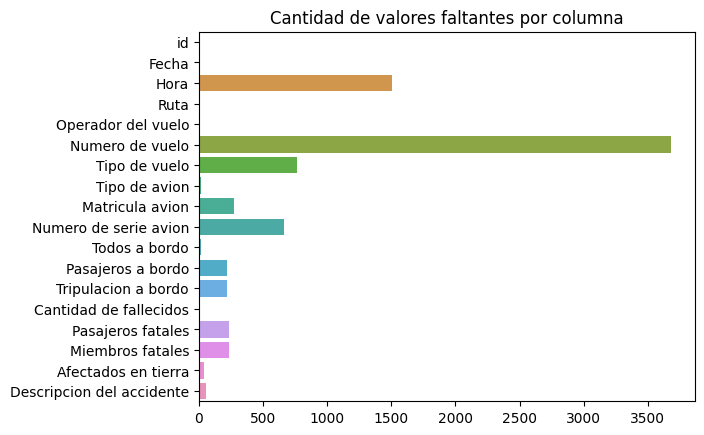

In [46]:
# Ploteamos el numero de faltantes por columna
sns.barplot(x = df_accidente.isnull().sum().values, y = df_accidente.columns)
plt.title('Cantidad de valores faltantes por columna')

Podemos observar que hay columnas donde los valores nulos están muy presentes, como el la columna 'Numero de vuelo' seguido por 'Hora'. Mientras hay columnas como 'Fecha' donde se encuentran todos sus valores.

##### Agrupamos los accidentes por año para poder hacer analisis por año

In [47]:
# Agrupamos los accidentes por años
df_accidente['Año'] = pd.DatetimeIndex(df_accidente['Fecha']).year

Guardamos la parte de ETL

In [48]:
df_accidente.to_csv("data/accidente_limpio.csv", index=False)

## Ahora si, es momento de comenzar el EDA

Cantidad de valores únicos por columna

Text(0.5, 1.0, 'Cantidad de valores únicos por columna')

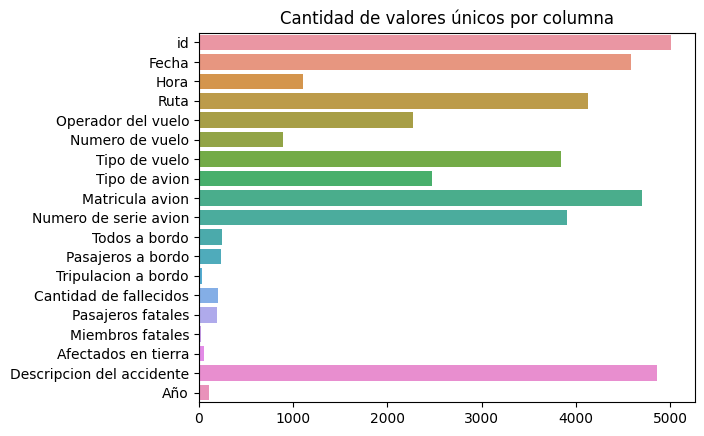

In [49]:
sns.barplot(x = df_accidente.nunique().values, y = df_accidente.columns)
plt.title('Cantidad de valores únicos por columna')

##  Variables Cuantitativas

Todos a bordo,

Pasajeros a bordo, 

Tripulacion a bordo, 

Cantidad de fallecidos,

Pasajeros fatales, 

Miembros fatales,

Afectados en tierra,

Todas ellas apuntan a una cantidad de personas 

#### Histograma con una estimación de la densidad kernel (KDE) para cada una de estas columnas numéricas

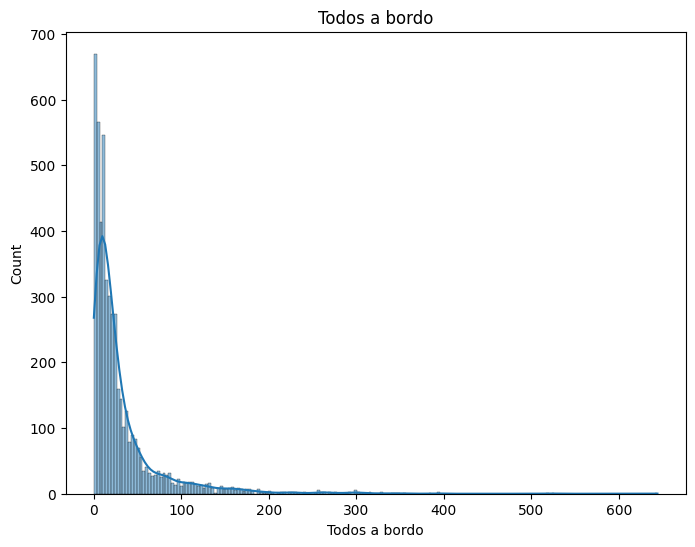

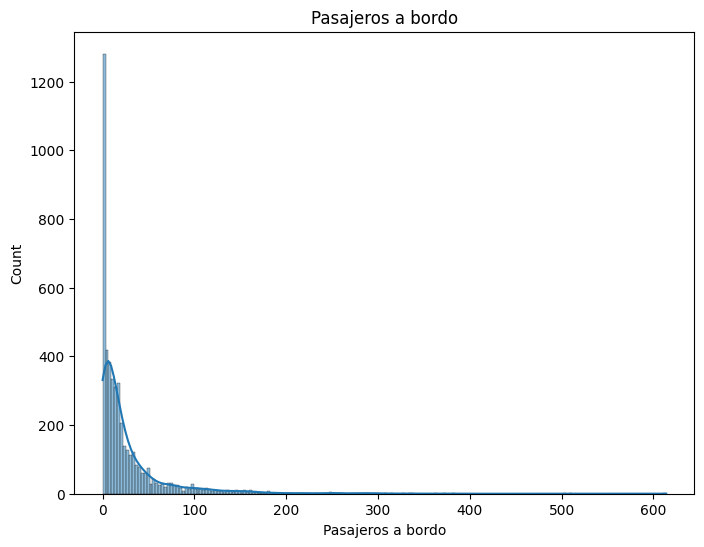

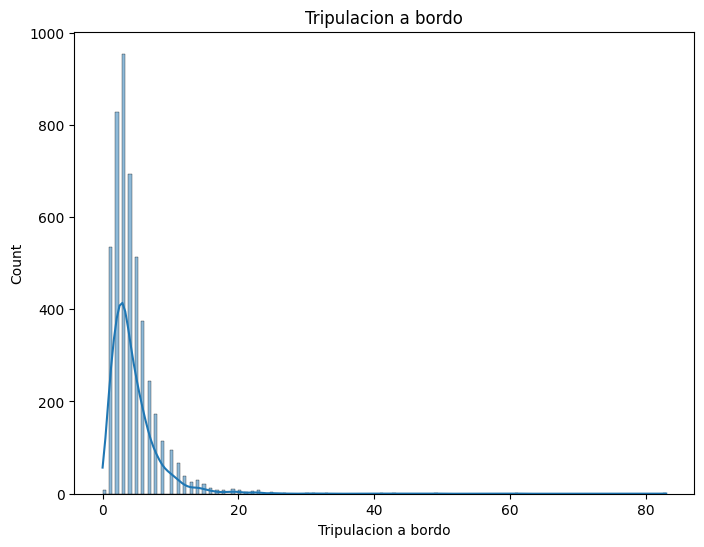

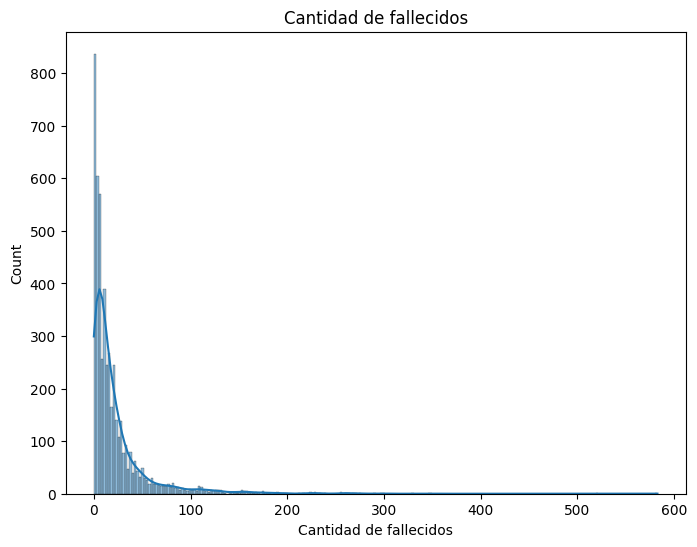

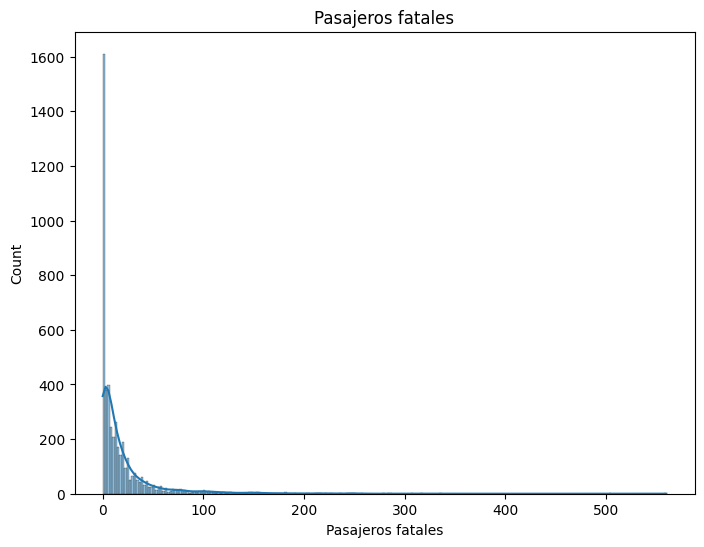

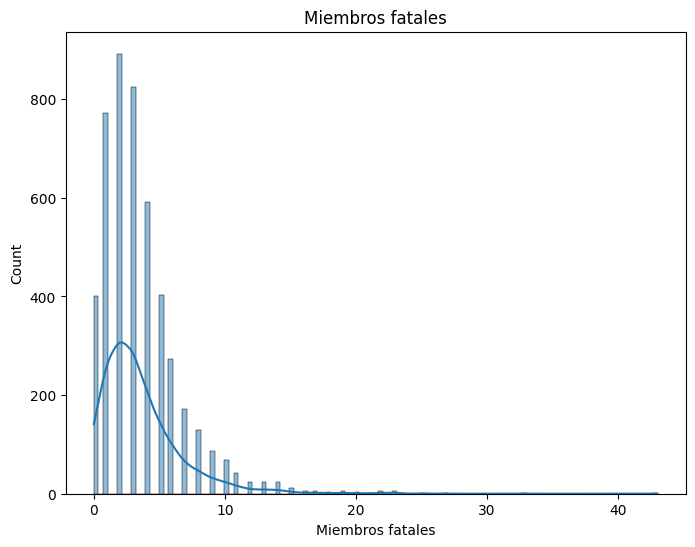

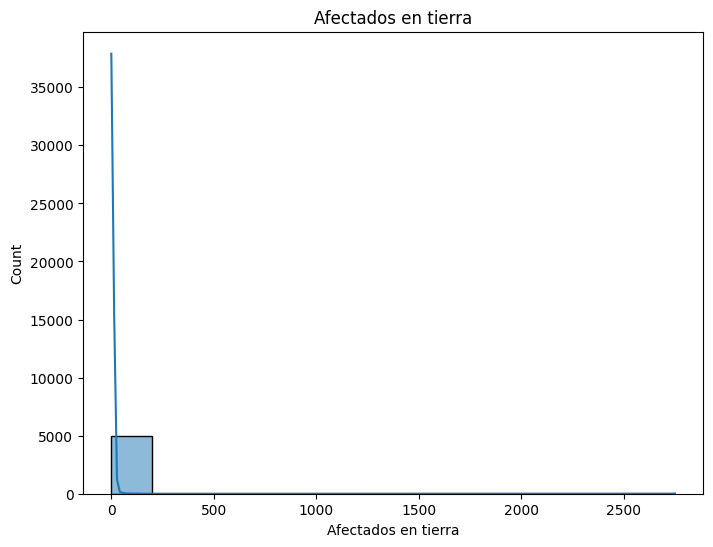

In [50]:
variables_numericas = ['Todos a bordo', 'Pasajeros a bordo', 'Tripulacion a bordo', 
                       'Cantidad de fallecidos', 'Pasajeros fatales', 'Miembros fatales', 'Afectados en tierra']

for column in variables_numericas:
    df_accidente[column] = pd.to_numeric(df_accidente[column], errors="coerce")
    plt.figure(figsize=(8, 6))
    sns.histplot(df_accidente[column].dropna(), kde=True)
    plt.title(column)
    plt.show() 

Se puede observar que hay una alta concentración de valores en 'Todos a bordo' y'Tripulacion a bordo'. Hay un sesgo positivo en todas menos 'Afectados en tierra' donde hay muy poca variabilidad en los valores, todos los valores tienen la misma probabilidad de ocurrir.

#### Utilizaremos una matriz de correlación para identificar la dirección de la relación entre las variables. 


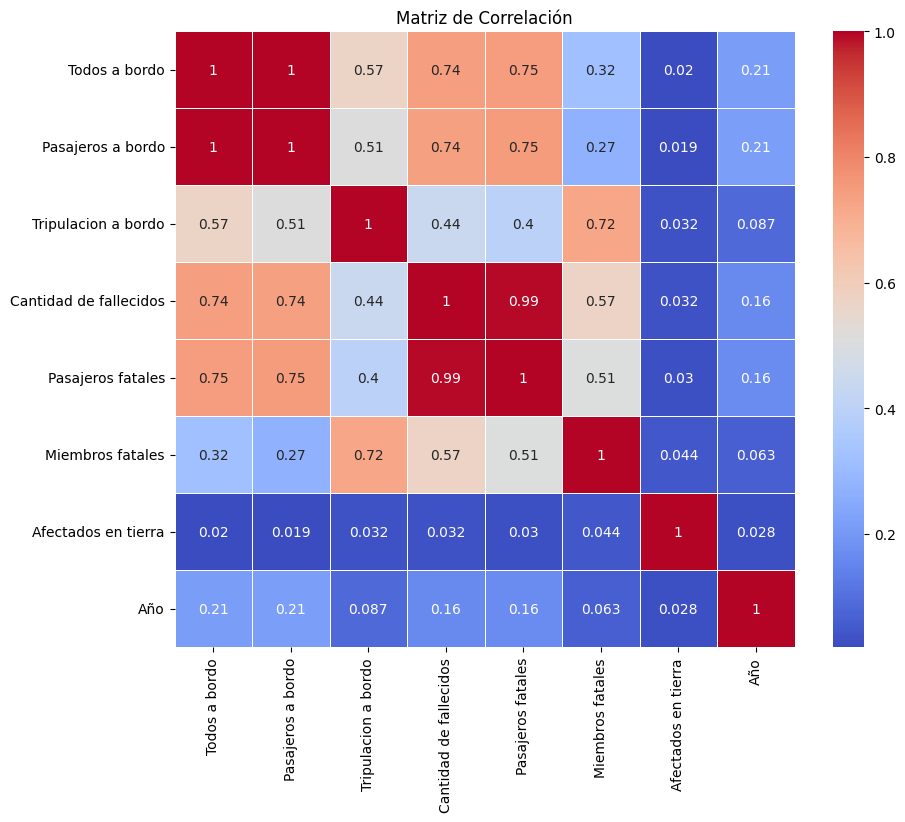

In [51]:
# Subconjunto de las columnas que quieres analizar
columnas_de_interes = [
    'Todos a bordo',
    'Pasajeros a bordo',
    'Tripulacion a bordo',
    'Cantidad de fallecidos',
    'Pasajeros fatales',
    'Miembros fatales',
    'Afectados en tierra',
    'Año'
]

# Crear un DataFrame que contenga solo estas columnas
df_subset = df_accidente[columnas_de_interes]

# Calcular la matriz de correlación
correlation_matrix = df_subset.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

El resultado es que 'Todos a bordo' tiene una correlación perfecta con sí misma, es decir, 1 en la diagonal principal, lo cuál era esperable. 'Cantidad de fallecidos' y 'Pasajeros fatales' tuvieron valores de correlación cercanos a 0.99 con 'Todos a bordo', esto sugiere una fuerte correlación positiva entre estas variables. En otras palabras, cuando la cantidad de pasajeros a bordo aumenta, es muy probable que la cantidad de personas fallecidas y la cantidad de pasajeros fatales también aumenten en conjunto, lo que tiene sentido en el contexto de un accidente o evento en el que todas estas variables están relacionadas.

### Outliers

Realizaremos boxplots para visualizar la distribución de datos numéricos, brindando información sobre la dispersión de los datos, la mediana y los valores atípicos en cada columna.

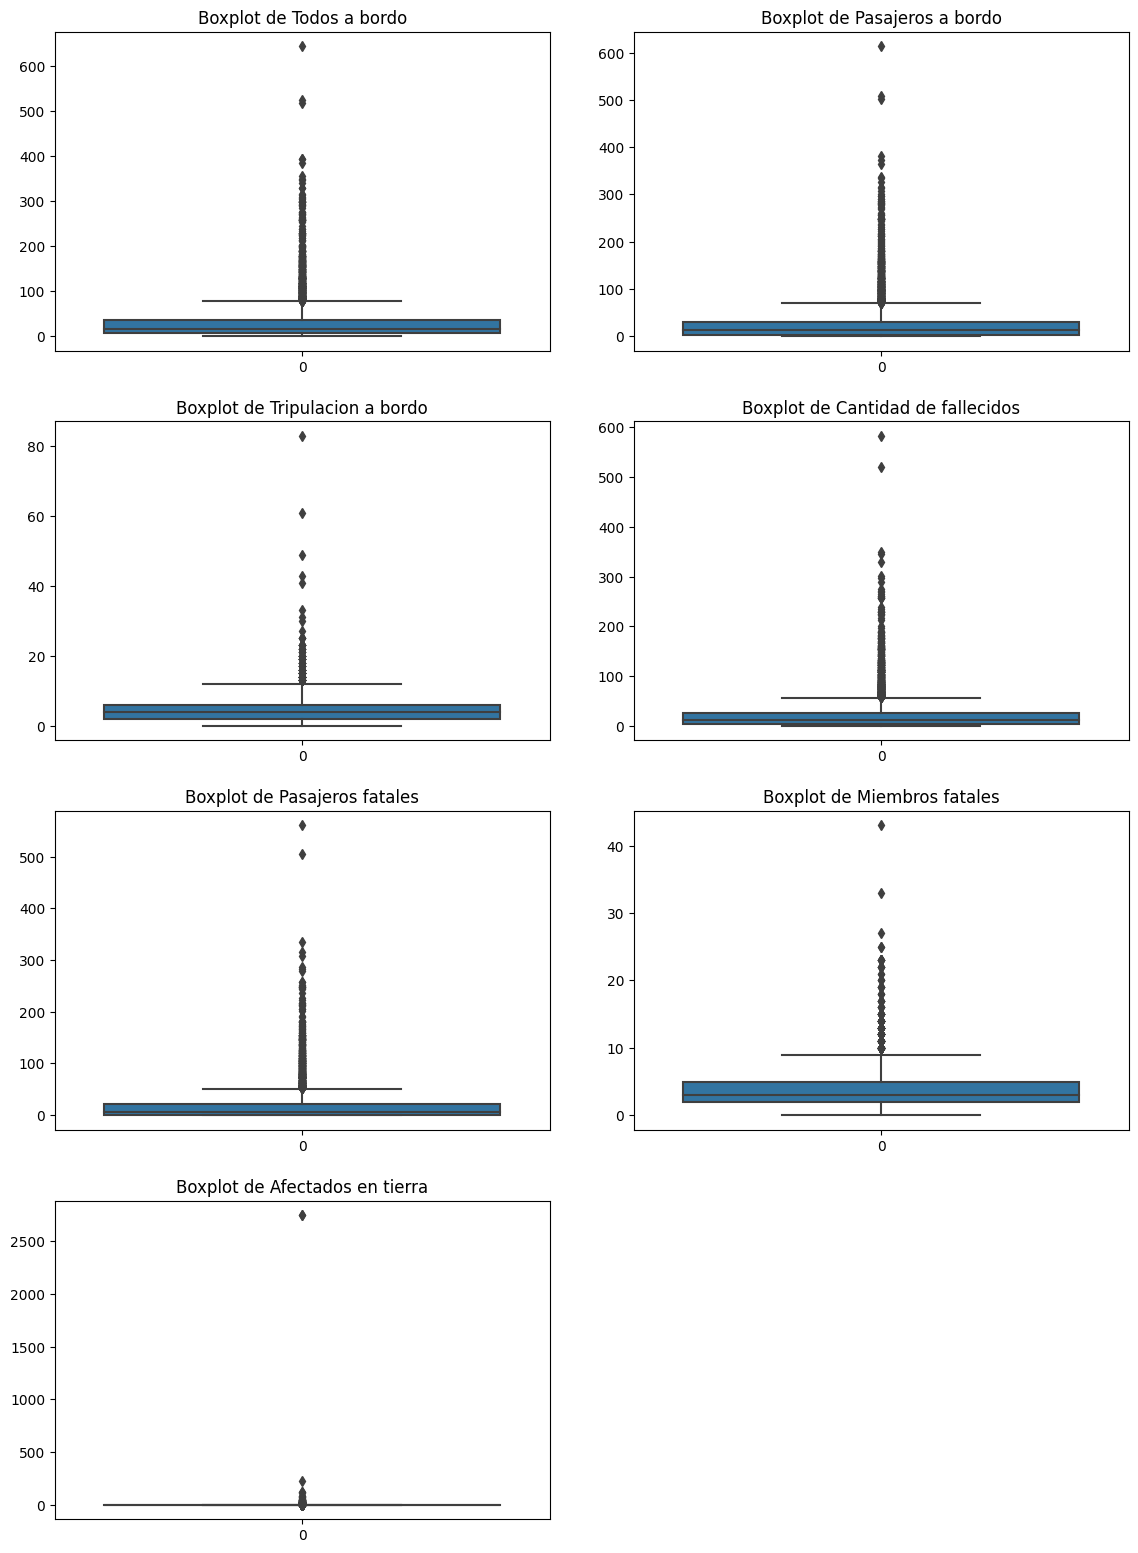

In [52]:
# Seleccionar columnas numéricas relevantes
columnas_numericas = ['Todos a bordo', 'Pasajeros a bordo', 'Tripulacion a bordo', 'Cantidad de fallecidos', 'Pasajeros fatales', 'Miembros fatales', 'Afectados en tierra']

# Calcular el número de subplots necesarios
num_subplots = len(columnas_numericas)
num_rows = (num_subplots + 1) // 2  # Asegura al menos 1 fila

# Crear subplots para mostrar los gráficos de boxplot
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
fig.tight_layout(pad=3.0)

# Recorrer las columnas numéricas y crear los boxplots
for i, columna in enumerate(columnas_numericas):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df_accidente[columna], ax=axs[row, col])
    axs[row, col].set_title(f'Boxplot de {columna}')

# Ocultar subplots vacíos si es necesario
if num_subplots % 2 != 0:
    axs[-1, -1].axis('off')

# Mostrar los gráficos
plt.show()

En los boxplot podemos ver que solo en la 'Tripulación a bordo' hay una mediana(datos arriba y abajo del 50%), mientras que en los demás los datos están por debajo de la mediana indicando 
una asimetría positiva en la distribución.

En 'Afectados en tierra' la caja es muy pequeña o inexistente lo que indica que los datos están sesgados, tienen muy poca variabilidad.

Los outliers representaban la realidad ya que fueron acontecimientos de gran escala por lo que no siguen la línea de los demás datos, por lo que no se toma medidas.

## Variables categóricas

Ruta 

Operador del vuelo

Numero de vuelo 

Tipo de vuelo 

Tipo de avion 

Matricula avion

Numero de serie avion 

Descripcion del accidente

### Analizamos las rutas más frecuentes

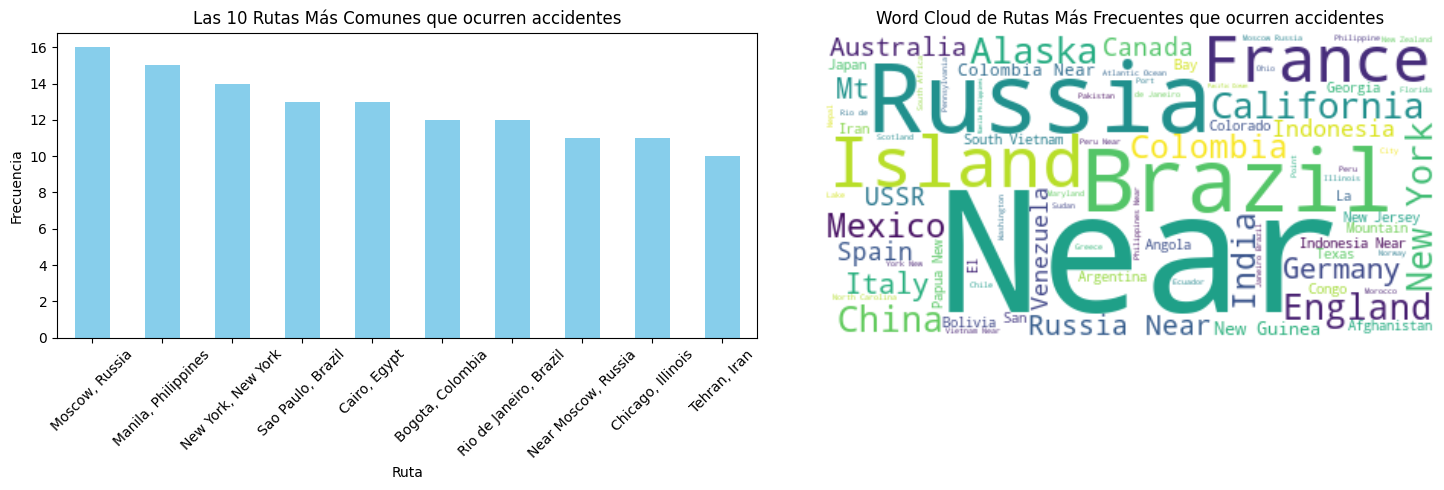

In [53]:
# 'Ruta' es la columna de interés
ruta_counts = df_accidente['Ruta'].value_counts().head(10)  # Obtén las 10 rutas más comunes
ruta_text = ' '.join(df_accidente['Ruta'].dropna())  # Combina todas las rutas en un solo texto

# Crea una figura con dos subgráficos (uno para el gráfico de barras y otro para el Word Cloud)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras
ruta_counts.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_xlabel('Ruta')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Las 10 Rutas Más Comunes que ocurren accidentes')
ax1.tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

# Word Cloud
wordcloud = WordCloud(width=400, height=200, background_color='white').generate(ruta_text)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Word Cloud de Rutas Más Frecuentes que ocurren accidentes')

# Ajusta el espacio entre los subgráficos
plt.tight_layout()
plt.show()

Ruta más frecuente encontramos a Russia seguida de Philippines, la mayoria de las rutas tienen una frecuencia similar con una frecuencia entre 16 y 11

### Analizamos cuales son las aerolíneas más frecuentadas

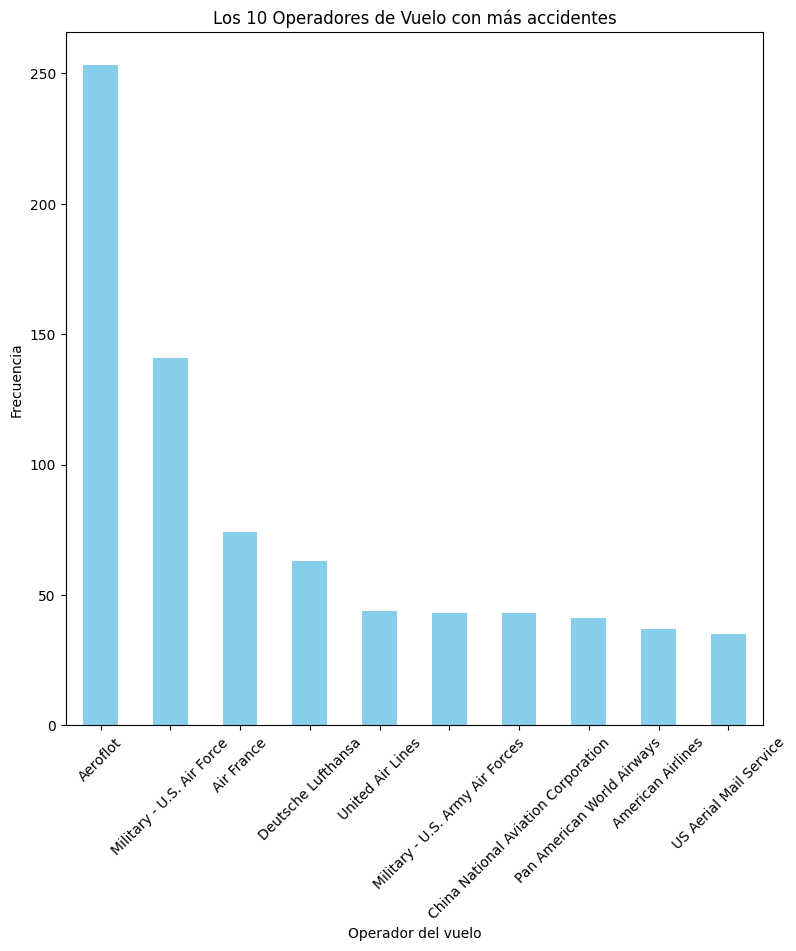

In [54]:
# 'Operador del vuelo' es la columna de interés
operador_counts = df_accidente['Operador del vuelo'].value_counts().head(10)  # Obtén los 10 operadores más comunes

# Crea un gráfico de barras
plt.figure(figsize=(9, 9))
operador_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Operador del vuelo')
plt.ylabel('Frecuencia')
plt.title('Los 10 Operadores de Vuelo con más accidentes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()


La aerolínea más frecuente es Aeroflot (255) la cuál esta casi el doble por encima de la segunda que es Military-U.S.Air Force la cual su número de frecuencia es 140.

### Tipos de vuelo frecuentes

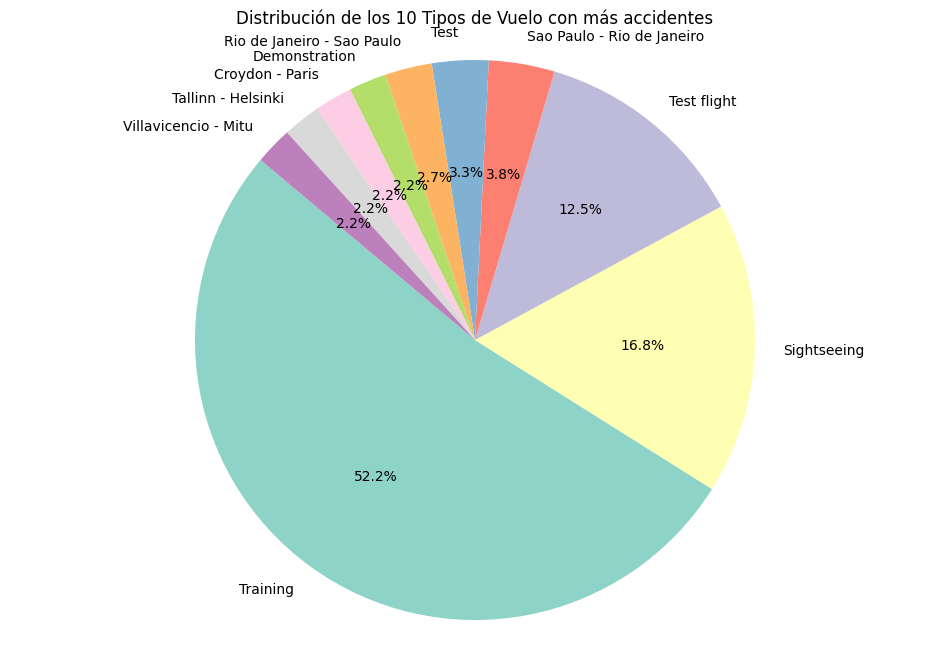

In [55]:
# Obtén los 10 tipos de vuelo más frecuentes
tipo_vuelo_counts_top10 = df_accidente['Tipo de vuelo'].value_counts().head(10)

# Crea el gráfico de pastel
plt.figure(figsize=(12, 8))
plt.pie(tipo_vuelo_counts_top10, labels=tipo_vuelo_counts_top10.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))

# Personaliza el título
plt.title('Distribución de los 10 Tipos de Vuelo con más accidentes')

# Muestra el gráfico
plt.axis('equal')  # Hace que el gráfico sea un círculo perfecto
plt.show()

Como resultado, los vuelos mas frecuentes son los vuelos de capacitación con una frecuencia del 52.2%, seguidos los de turismo (16.8%) y vuelo de prueba (12.5%). Le siguen vuelos con una frecuencia bastante similar los cuales son: Sao Paolo-Rio dew janeiro, prueba, Rio de Janeiro - Sao Paolo, demostración, Croydon-Paris, Tallinn-Helsinki y Villavicencio-Mitu

### Tipos de avión

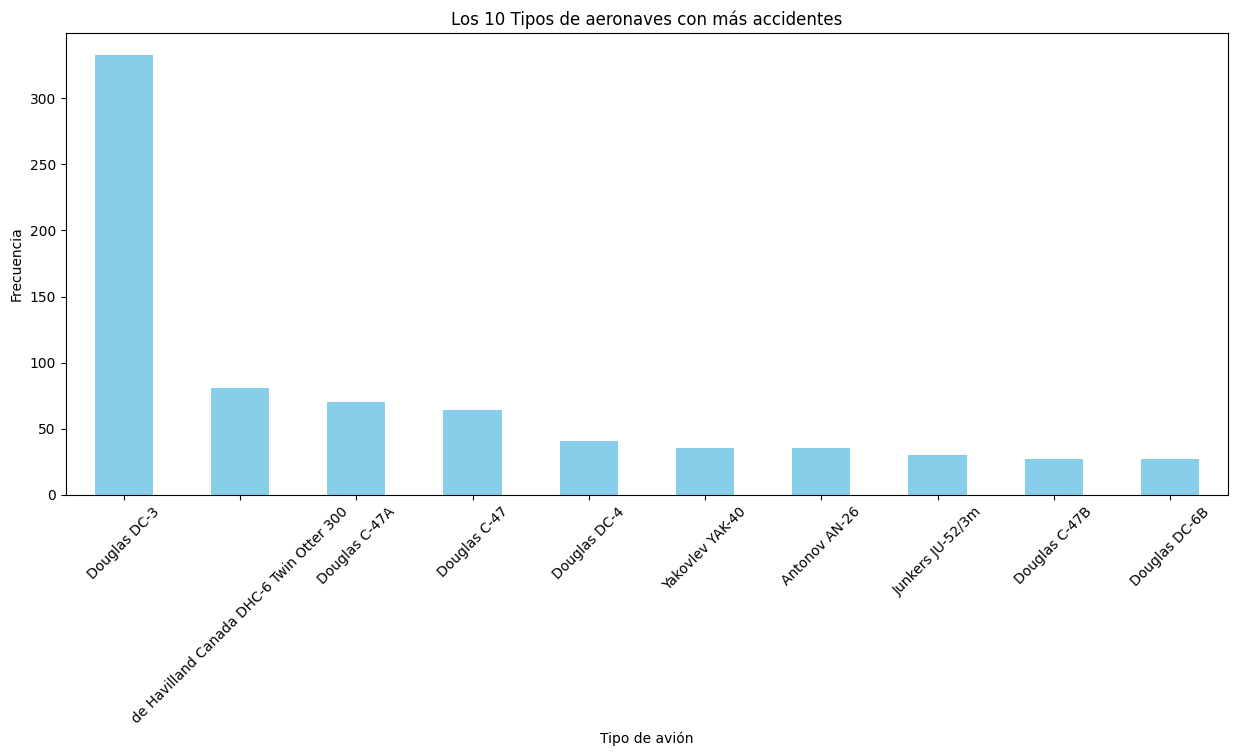

In [56]:
# Supongamos que df_accidente es tu DataFrame y 'Tipo de avion' es la columna de interés
tipo_avion_counts = df_accidente['Tipo de avion'].value_counts().head(10)  # Obtén los 10 tipos de avión más comunes

# Crea un gráfico de barras
plt.figure(figsize=(15, 6))
tipo_avion_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de avión')
plt.ylabel('Frecuencia')
plt.title('Los 10 Tipos de aeronaves con más accidentes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()

El avión más frecuente es Douglas DC-3  el cuál supera teniendo una frecuencia de 340, mientras que los demás tipos de aviones quedan muy por debajo de su frecuencia, teniendo el del segundo lugar solo una frecuencia de 80

#### Realizamos un Word Cloud para observar más palabras mostrando por tamaño cuales son más relevantes

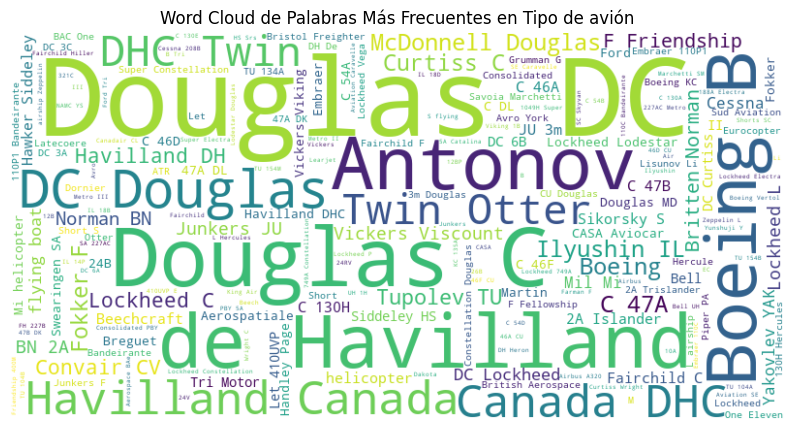

In [57]:
descripcion_text = ' '.join(df_accidente['Tipo de avion'].dropna())  # Combina todas las descripciones en un solo texto

# Crea un Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descripcion_text)

# Muestra el Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Palabras Más Frecuentes en Tipo de avión')
plt.show()

### Descripción del accidente: 
utilizamos Word Cloud para ver las las palabras más frecuentes

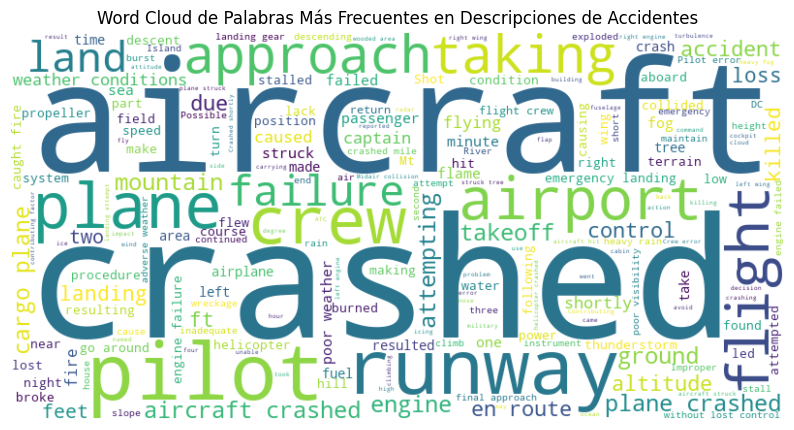

In [58]:
descripcion_text = ' '.join(df_accidente['Descripcion del accidente'].dropna())  # Combina todas las descripciones en un solo texto

# Crea un Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descripcion_text)

# Muestra el Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Palabras Más Frecuentes en Descripciones de Accidentes')
plt.show()

## Ya habiendo explorado las tendencias, es momento de comenzar a analizar los accidentes, el cuál tiene como punto de partida datos producidos desde inicios del siglo XX.

### Cantidad de accidentes por año

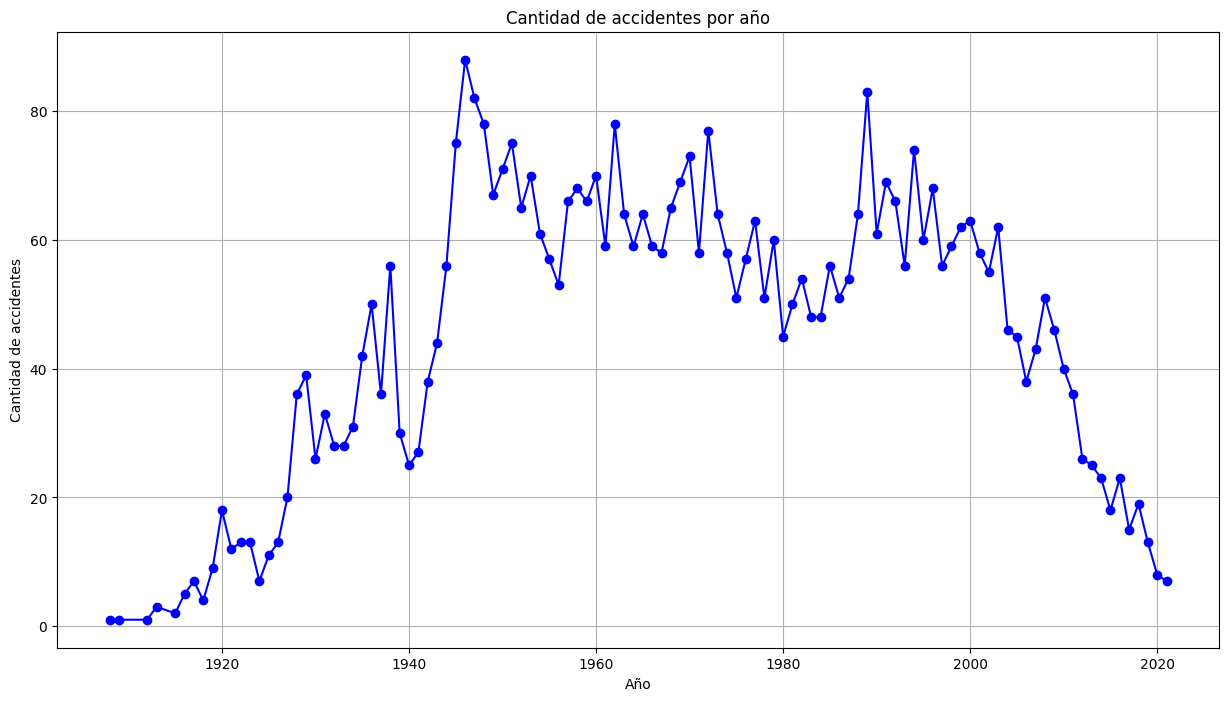

In [59]:
# Agrupa los datos por año y calcula la cantidad de accidentes en cada año
data = df_accidente.groupby('Año').size()
# Crea el gráfico de series temporales
plt.figure(figsize=(15, 8))
data.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Cantidad de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.grid(True)
plt.show()

El pico de accidentes se generó luego de una caída, siendo con mas de 80 accidentes aéreos el año 1946, posiblemente por la post guerra mundial, además se observa que a partir del año 1989 hay un descenso de los accidentes.

El año 2017 fué el año más seguro tanto por el número de accidentes como por la cantidad de víctimas, gracias a los avances tecnológicos

##### Vemos cuantos accidentes suceden por mes

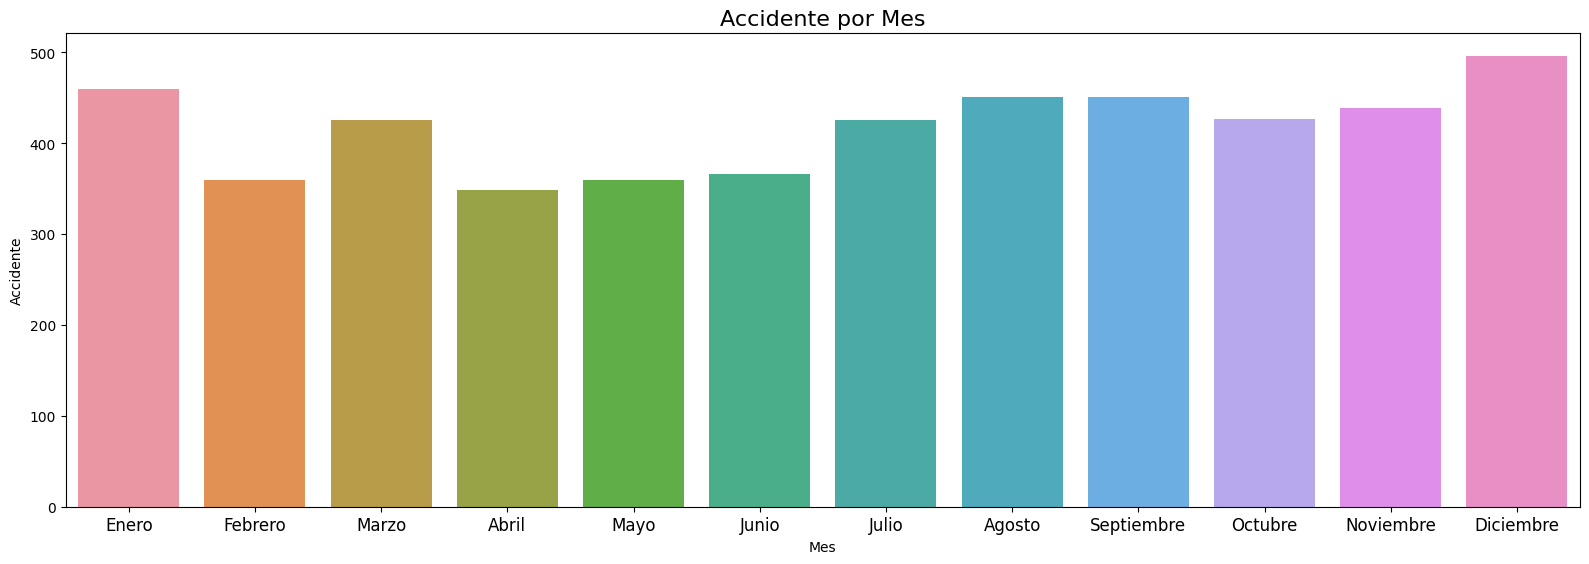

In [60]:
# Estraemos el año, mes y dia de la columna 
months = ["Enero","Febrero","Marzo","Abril","Mayo", "Junio", "Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
df_accidente["Mes"] = df_accidente["Fecha"].apply(lambda x: x.month)
df_month = df_accidente["Mes"].value_counts().sort_index()
figure = plt.figure(figsize=(16,16))
axis2 = figure.add_subplot(3,1,2)
sns.barplot(x=df_month.index,y=df_month.values,ax=axis2)
axis2.set(ylabel="Accidente",xlabel="Mes")
axis2.set_title("Accidente por Mes",fontsize=16)
axis2.set_xticklabels(months,fontsize=12)
plt.tight_layout(w_pad=4, h_pad=2)
plt.show()

Como valor más alto está diciembre que se lo puede relacionar con ser el último mes del año por lo que hay más actividad, seguido de Enero

#### Los operadores de vuelo más frecuentes y relación con cantidad de fallecidos 

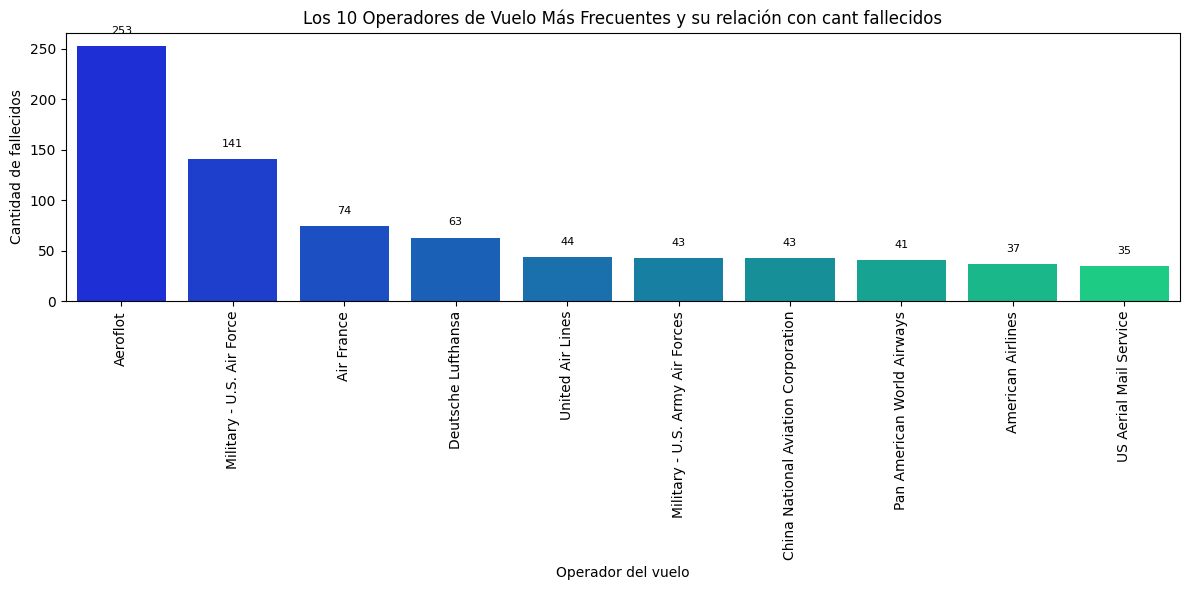

In [61]:
# Contar las ocurrencias de cada operador de vuelo
operador_frecuente = df_accidente['Operador del vuelo'].value_counts().head(10)

# Crear el gráfico de barras solo con los 10 operadores de vuelo más frecuentes
plt.figure(figsize=(12, 6))
sns.barplot(x=operador_frecuente.index, y=operador_frecuente.values, palette="winter")

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)

# Agregar etiquetas a las barras
for i, v in enumerate(operador_frecuente):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=8)

# Titular los ejes
plt.xlabel('Operador del vuelo')
plt.ylabel('Cantidad de fallecidos')
plt.title('Los 10 Operadores de Vuelo Más Frecuentes y su relación con cant fallecidos')

plt.tight_layout()
plt.show()

Podemos observar que la aerolinea más frecuente tiene una tasa superior con una cantidad de 253 fallecidos(hay que tener en cuenta que anteriormente vimos que esta aerolínea tiene mas del doble de accidentes que las demás), siguiendole military-U.S.A.Air Force con 141, las demás se mantienen con valores similares.

#### Número total de personas a bordo del vuelo, número de personas que sobrevivieron en el vuelo y muertes ocurridas.

##### Cantidad de víctimas

In [62]:
df_accidente["Cantidad de fallecidos"].describe()

count    5000.000000
mean       22.294000
std        35.000385
min         0.000000
25%         4.000000
50%        11.000000
75%        25.000000
max       583.000000
Name: Cantidad de fallecidos, dtype: float64

-La cantidad de filas en la columna 'Cantidad de fallecidos'  es de 5000.

-mean: La media (promedio) de la cantidad de fallecidos es aproximadamente 22.294. 

-std: La desviación estándar es de aproximadamente 35.000385. Esto indica que la cantidad de fallecidos varía considerablemente entre los incidentes registrados, ya que la desviación estándar es relativamente alta en comparación con la media.          Algunos incidentes tienen muchas más víctimas mortales que otros.

-min: El valor mínimo es 0, lo que significa que hubo incidentes en los que no hubo fallecidos registrados.

-25%: El primer cuartil (25%) es 4. Esto significa que el 25% de los incidentes tienen 4 fallecidos o menos.

-50%: La mediana (50%) es 11. Esto indica que la mitad de los incidentes tienen 11 fallecidos o menos, y la otra mitad tiene más de 11 fallecidos.

-75%: El tercer cuartil (75%) es 25. Esto significa que el 75% de los incidentes tienen 25 fallecidos o menos.

-max: El valor máximo es 583. Esto indica que el incidente con el mayor número de fallecidos registrado en tus datos tuvo 583 víctimas mortales.

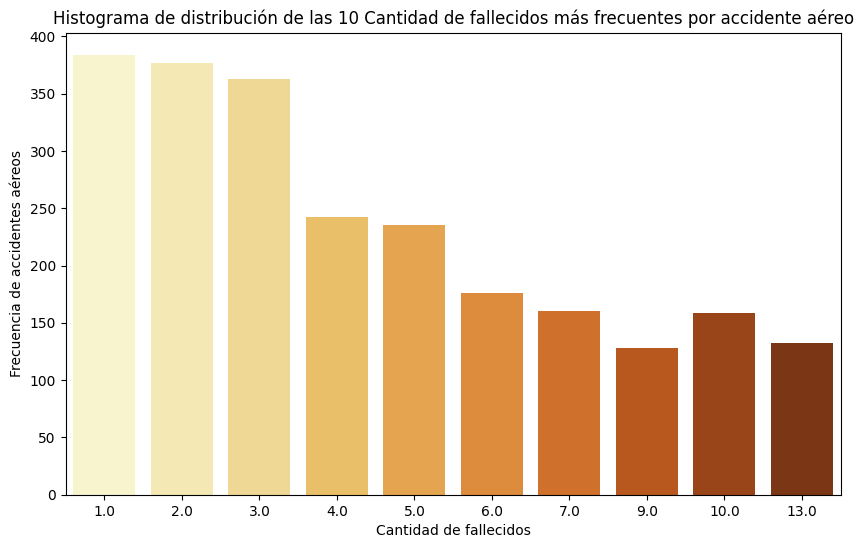

In [63]:
plt.figure(figsize=(10, 6))

# Filtrar los valores sin datos o nulos
df_filtrado = df_accidente[df_accidente["Cantidad de fallecidos"] != 0]

# Contar la frecuencia de cada valor y ordenarlos de manera descendente
frecuencia_fallecidos = df_filtrado['Cantidad de fallecidos'].value_counts().reset_index()
frecuencia_fallecidos.columns = ['Cantidad de fallecidos', 'Frecuencia']

# Visualizar los 10 valores más frecuentes
top_10_frecuentes = frecuencia_fallecidos.head(10)

sns.barplot(data=top_10_frecuentes, x='Cantidad de fallecidos', y='Frecuencia', palette="YlOrBr")

plt.ylabel("Frecuencia de accidentes aéreos")
plt.xlabel("Cantidad de fallecidos")
plt.title("Histograma de distribución de las 10 Cantidad de fallecidos más frecuentes por accidente aéreo")

plt.show()

Se puede observar que de una frecuencia de más de 355 accidentes de aeronaves, solo hay una víctima, seguido de 2 víctimas o 3, lo que se debe a que hay más cantidad de vuelos donde mueren menos personas porque están en vuelos de entrenamiento o prueba donde hay menor capacidad y puede haber circunstancias como problemas técnicos o de experiencia por lo que se genera el accidente.

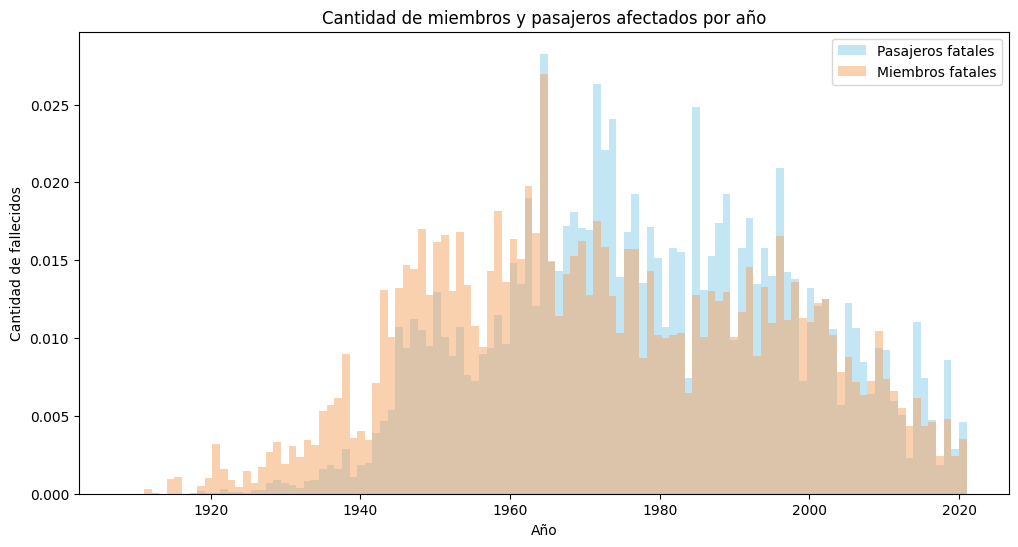

In [64]:
#Agrupar por año y sumar la cantidad de pasajeros fallecidos por año
total_pasajeros_fallecidos = df_accidente.groupby(df_accidente['Fecha'].dt.year)['Pasajeros fatales'].sum()

#Agrupar por año y sumar la cantidad de tripulacion fallecidos por año
total_tripulacion_fallecida = df_accidente.groupby(df_accidente['Fecha'].dt.year)['Miembros fatales'].sum()

#Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(total_pasajeros_fallecidos.index, bins=len(total_pasajeros_fallecidos), weights=total_pasajeros_fallecidos.values, alpha=0.5, color='skyblue', label='Pasajeros fatales', density=True)
plt.hist(total_tripulacion_fallecida.index, bins=len(total_tripulacion_fallecida), weights=total_tripulacion_fallecida.values, alpha=0.5, color='sandybrown', label='Miembros fatales', density=True)
plt.title('Cantidad de miembros y pasajeros afectados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de fallecidos')
plt.legend()
plt.show()

#### Relación entre Todos a bordo y Fallecidos totales

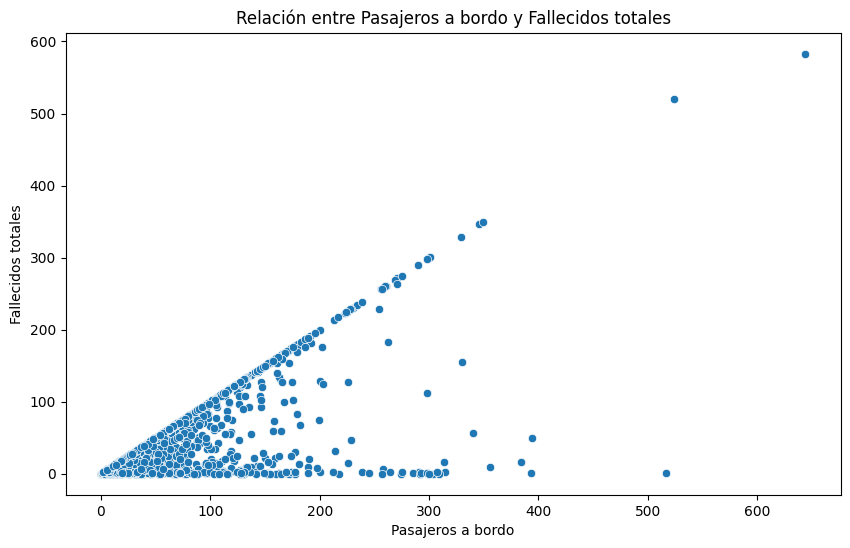

In [65]:
# Gráfico de dispersión entre las columnas "Todos a bordo" y "Cantidad de fallecidos"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_accidente, x="Todos a bordo", y="Cantidad de fallecidos")
plt.title("Relación entre Pasajeros a bordo y Fallecidos totales")
plt.xlabel("Pasajeros a bordo")
plt.ylabel("Fallecidos totales")
plt.show()

Los valores que caen por debajo de la línea de dispersión son casos atípicos o excepcionales en los que, a pesar de haber un gran número de pasajeros a bordo, la cantidad de fallecidos no fue tan alta como se podría esperar según la tendencia general. 

#### Observamos víctimas con relación al tiempo

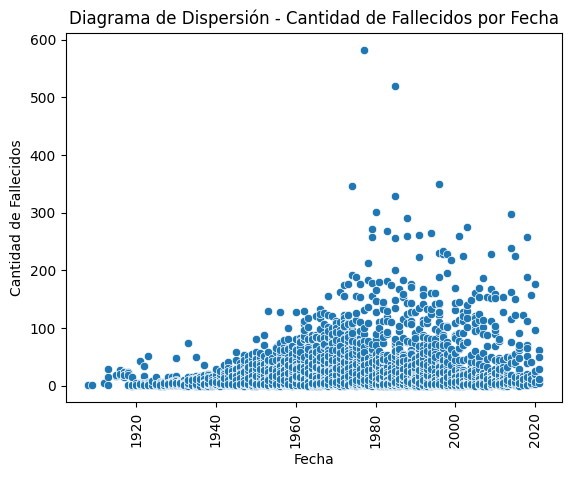

In [66]:
sns.scatterplot(x='Año', y='Cantidad de fallecidos', data=df_accidente)

plt.xticks(rotation=90)

plt.title('Diagrama de Dispersión - Cantidad de Fallecidos por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Fallecidos')

plt.show()

Cantidad de sobrevivientes y fallecidos en los primeros años

In [67]:
# Convertimos columnas relevantes a numericas
df_accidente["Todos a bordo"] = pd.to_numeric(df_accidente["Todos a bordo"], errors='coerce')
df_accidente["Cantidad de fallecidos"] = pd.to_numeric(df_accidente["Cantidad de fallecidos"], errors='coerce')

# Calculamos numero de sobrevivientes
df_accidente["Sobrevivientes"] = df_accidente["Todos a bordo"] - df_accidente["Cantidad de fallecidos"]

# Calculamos el total de numero de sobrevivientes y muertes por año
fallecidos_sobrevivientes = df_accidente.pivot_table(values=["Cantidad de fallecidos", "Sobrevivientes"], index="Año", aggfunc=np.sum)


In [68]:
fallecidos_sobrevivientes.head(10)

,Cantidad de fallecidos,Sobrevivientes
Año,,
1908,1.0,1.0
1909,1.0,0.0
1912,5.0,0.0
1913,43.0,6.0
1915,36.0,24.0
1916,108.0,1.0
1917,138.0,2.0
1918,65.0,0.0
1919,23.0,0.0


Cantidad de fallecidos y sobrevivientes en los últimos años

In [69]:
fallecidos_sobrevivientes.tail(10)

,Cantidad de fallecidos,Sobrevivientes
Año,,
2012,587.0,108.0
2013,287.0,495.0
2014,1142.0,34.0
2015,759.0,37.0
2016,515.0,388.0
2017,214.0,31.0
2018,874.0,365.0
2019,305.0,127.0
2020,355.0,348.0


In [70]:
# Ordenar el DataFrame en orden descendente según la cantidad de fallecidos
top_10_fechas_mas_fallecidos = df_accidente.sort_values(by='Cantidad de fallecidos', ascending=False).head(10)

# Mostrar las 10 fechas con más muertos
print("Las 10 fechas con más muertos son:")
print(top_10_fechas_mas_fallecidos[['Fecha', 'Cantidad de fallecidos']])

Las 10 fechas con más muertos son:
          Fecha  Cantidad de fallecidos
2902 1977-03-27                   583.0
3341 1985-08-12                   520.0
4057 1996-11-12                   349.0
2737 1974-03-03                   346.0
3337 1985-06-23                   329.0
3093 1980-08-19                   301.0
4895 2014-07-17                   298.0
3500 1988-07-03                   290.0
4433 2003-02-19                   275.0
3024 1979-05-25                   271.0


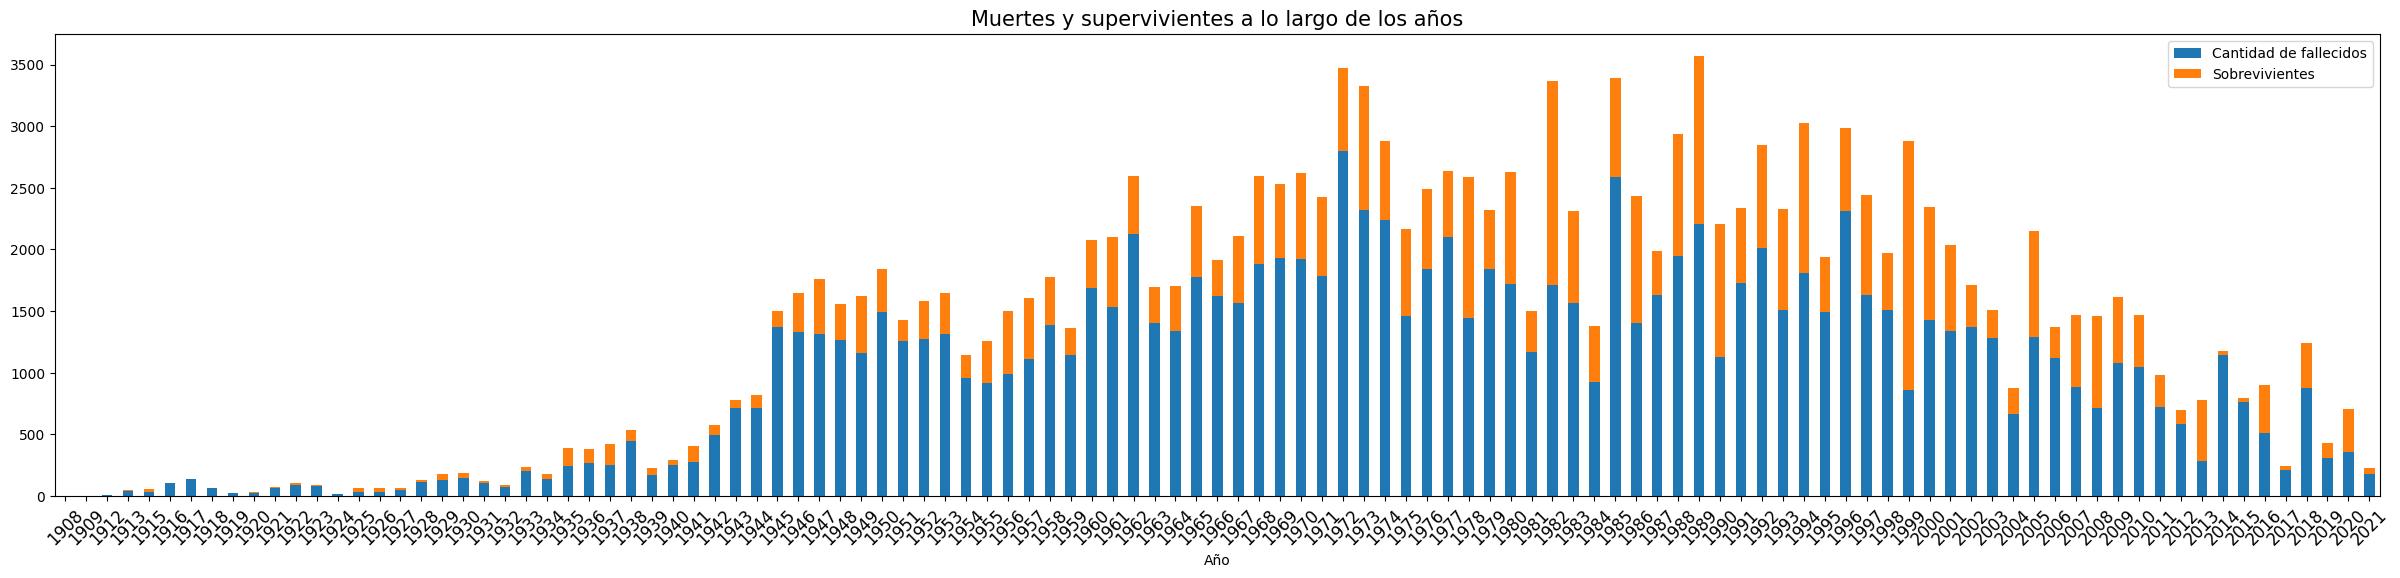

In [71]:
figure = plt.figure(figsize=(30, 6))
axis = figure.add_subplot(1, 1, 1)
fallecidos_sobrevivientes.plot(kind="bar", stacked=True, ax=axis)
plt.title("Muertes y supervivientes a lo largo de los años", fontsize=15)
axis.set_xticklabels(fallecidos_sobrevivientes.index, fontsize=12, rotation=45)
plt.show()

Notablemente hay mas fallecidos que sobrevivientes.